# Plot times series based the gridded fields 

In [15]:
using Dates
using DelimitedFiles 
using NCDatasets
using PyPlot
using DIVAnd
const plt=PyPlot
using PyCall
cmocean = PyCall.pyimport("cmocean")
plt.rc("font", family="Times New Roman", size=16)
include("../src/InterpCalanus.jl")
include("../src/config.jl")

"#456A30"

## Files and directories

In [3]:
isdir(resdir) ? @debug("already there") : mkpath(resdir)
isdir(figdir) ? @debug("already there") : mkpath(figdir)
isfile(datafile) ? @debug("already downloaded") : download(datafileURL, datafile)

"MBA_CPRdata_Emodnet_21Jan22.csv"

## Reading monthly and yearly results

In [6]:
resfile_yearmonth_fidmarchicus = joinpath(resdir, "calanus_finmarchicus_year_month.nc")
resfile_yearmonth_helgolandicus = joinpath(resdir, "calanus_helgolandicus_year_month.nc")
resfile_year_fidmarchicus = joinpath(resdir, "calanus_finmarchicus_year.nc")
resfile_year_helgolandicus = joinpath(resdir, "calanus_helgolandicus_year.nc")

isfile(resfile_yearmonth_fidmarchicus) & isfile(resfile_yearmonth_helgolandicus) & 
isfile(resfile_year_fidmarchicus) & isfile(resfile_year_helgolandicus)

true

In [8]:
lonyear_fid, lat_year_fid, times_year, field_year_fid, error_year = InterpCalanus.read_results(resfile_year_fidmarchicus)
_, _, _, field_year_helgo, _ = InterpCalanus.read_results(resfile_year_helgolandicus);
_, _, times_month, field_yearmonth_fid, error_month = InterpCalanus.read_results(resfile_yearmonth_fidmarchicus);
_, _, _, field_yearmonth_helgo, _ = InterpCalanus.read_results(resfile_yearmonth_helgolandicus);

In [10]:
yearlist = Dates.year.(times_year);

### Compute mean for the time series

In [16]:
fmean1 = InterpCalanus.compute_time_mean(field_year_fid)
fmean2 = InterpCalanus.compute_time_mean(field_year_helgo)
fmean3 = InterpCalanus.compute_time_mean(field_yearmonth_fid)
fmean4 = InterpCalanus.compute_time_mean(field_yearmonth_helgo);

## Make plots
### Years

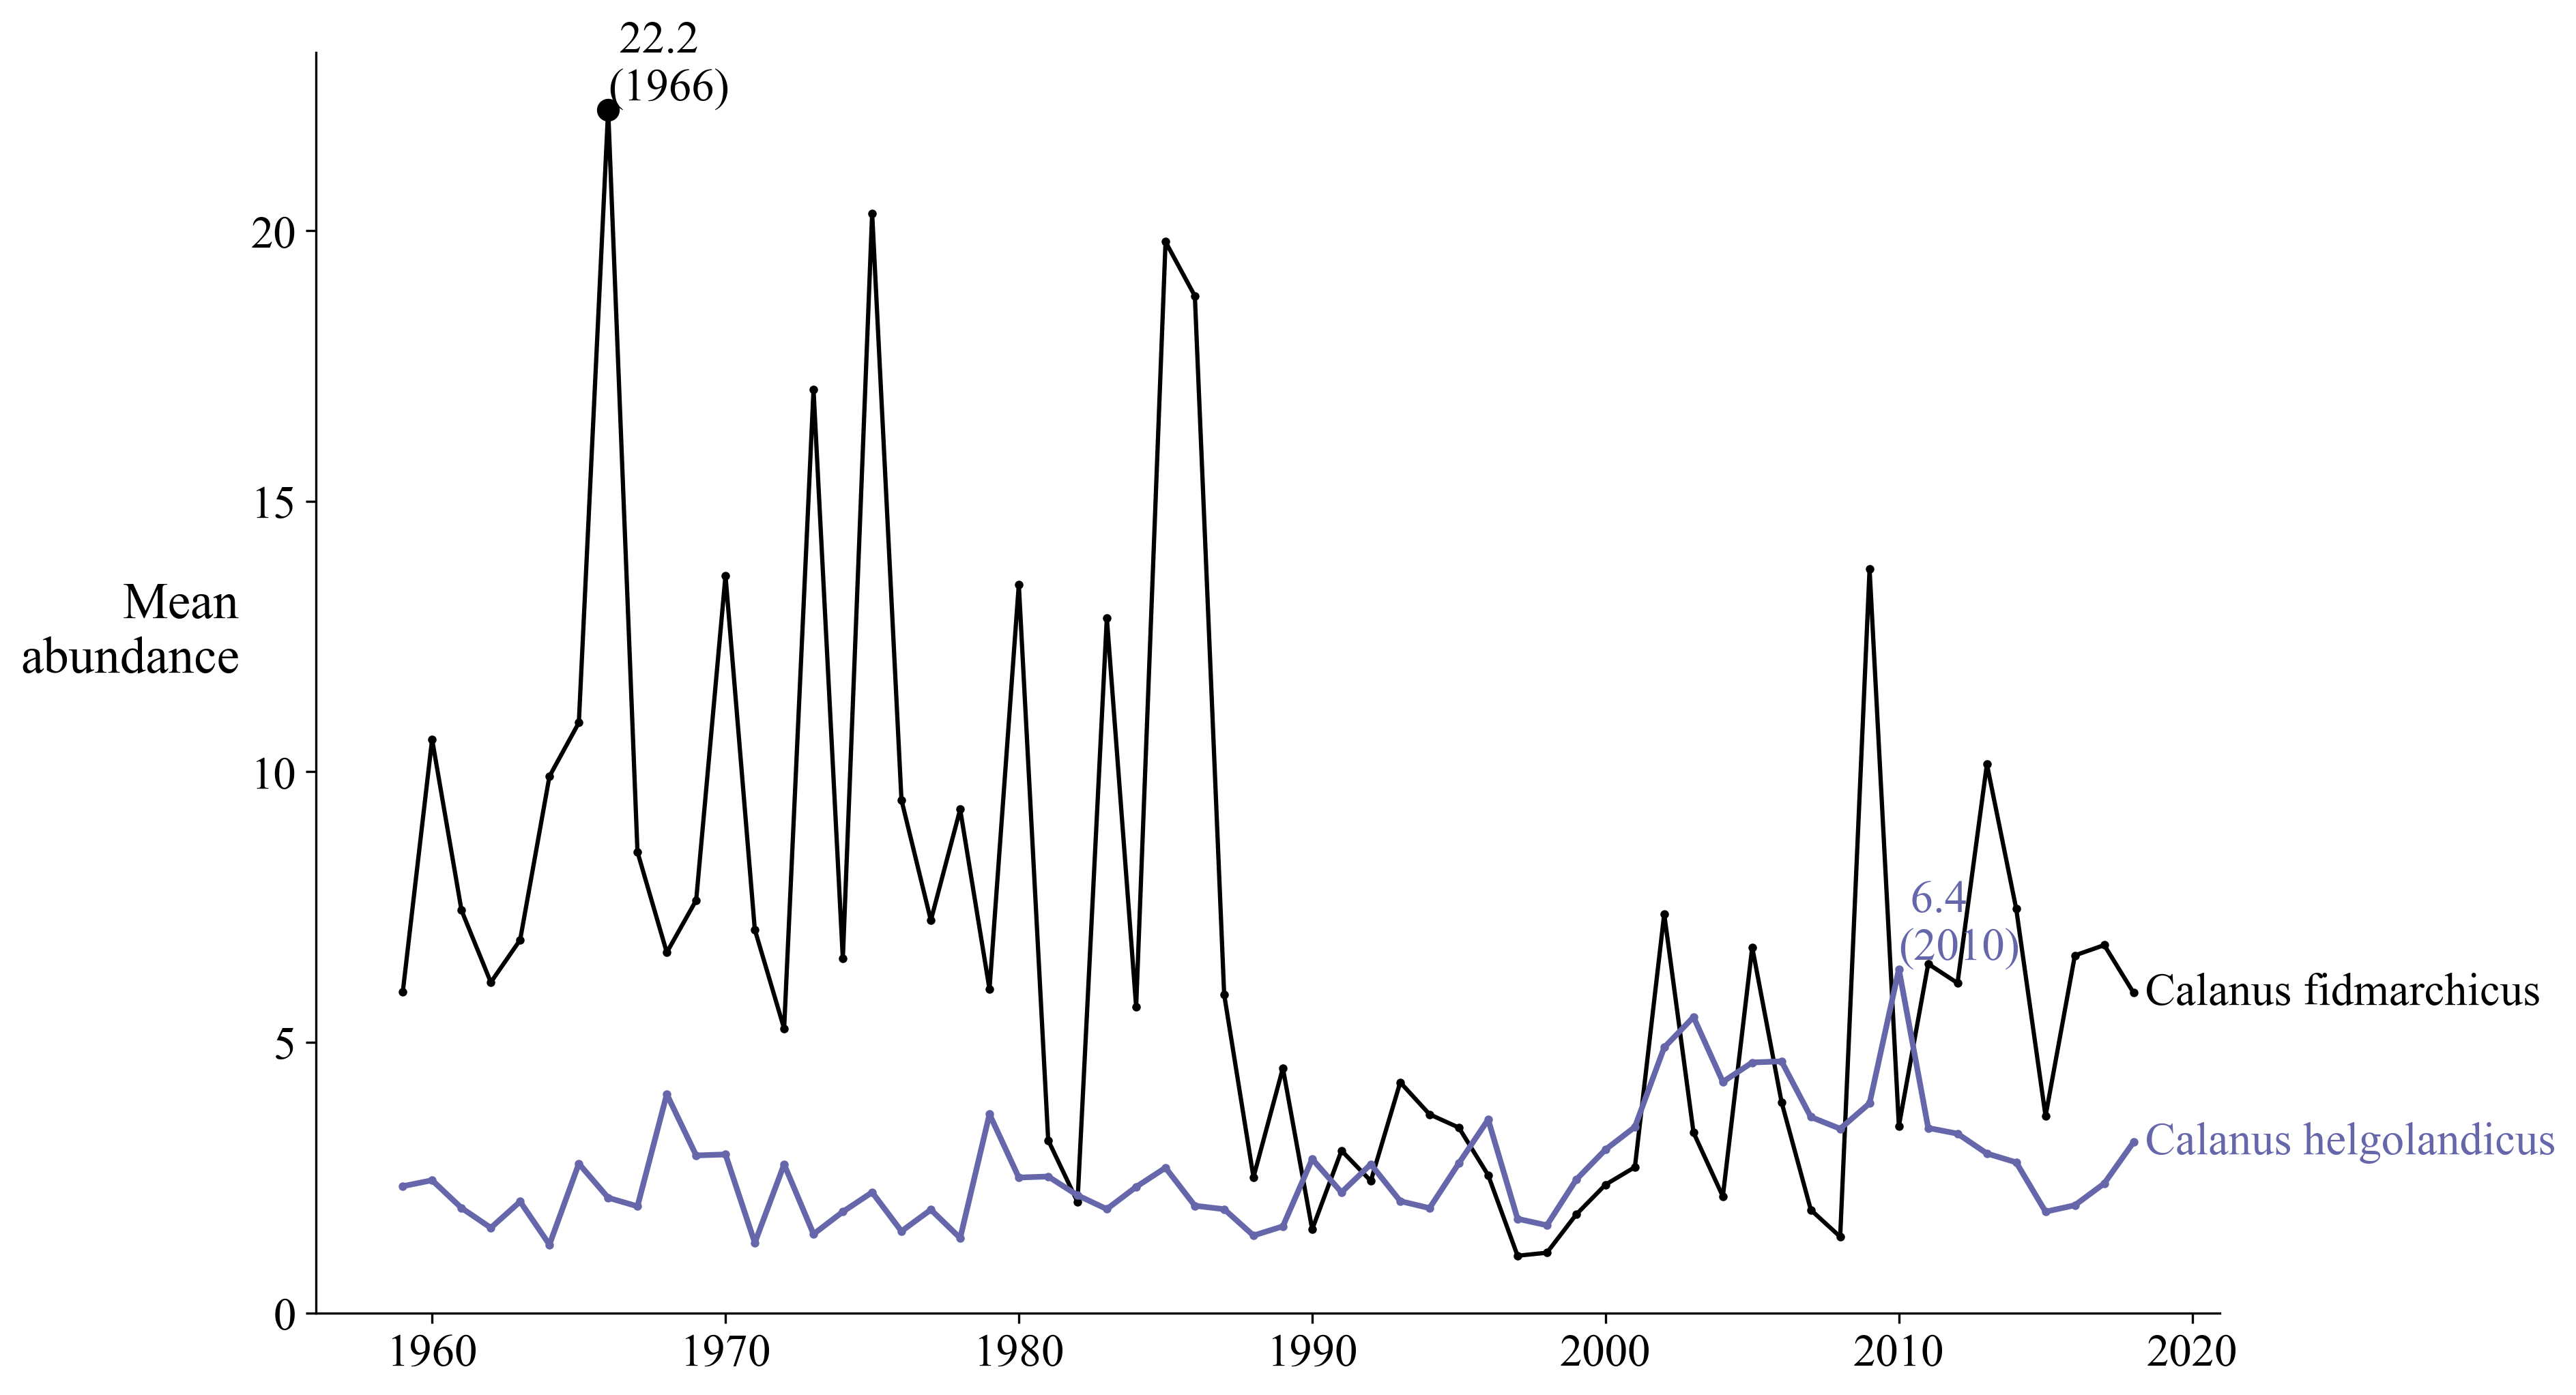

PyObject Text(350.875, 0.5, 'Mean\nabundance')

In [17]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
ax.plot(times_year, fmean1, "ko-", markersize=2, label="Calanus finmarchicus")
ax.plot(times_year, fmean2, "o-", linewidth=2, color=mycolor, markersize=2, label="Calanus helgolandicus")
ax.plot(times_year[argmax(fmean1)], maximum(fmean1), "ko", ms=7)
ax.text(times_year[argmax(fmean1)], maximum(fmean1), ha="left", va="bottom", 
    " $(round(maximum(fmean1), digits=1))\n($(yearlist[argmax(fmean1)]))")

ax.text(times_year[argmax(fmean2)], maximum(fmean2), ha="left", va="bottom", 
    " $(round(maximum(fmean2), digits=1))\n($(yearlist[argmax(fmean2)]))", color=mycolor)

ax.text(times_year[end], fmean1[end], " Calanus finmarchicus", va="center")
ax.text(times_year[end], fmean2[end], " Calanus helgolandicus", color=mycolor, va="center")
ax.set_ylabel("Mean\nabundance", rotation=0, ha="right", fontsize=18)
#plt.savefig(joinpath(figdir, "time_series_year"), dpi=300, bbox_inches="tight")

### Months

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


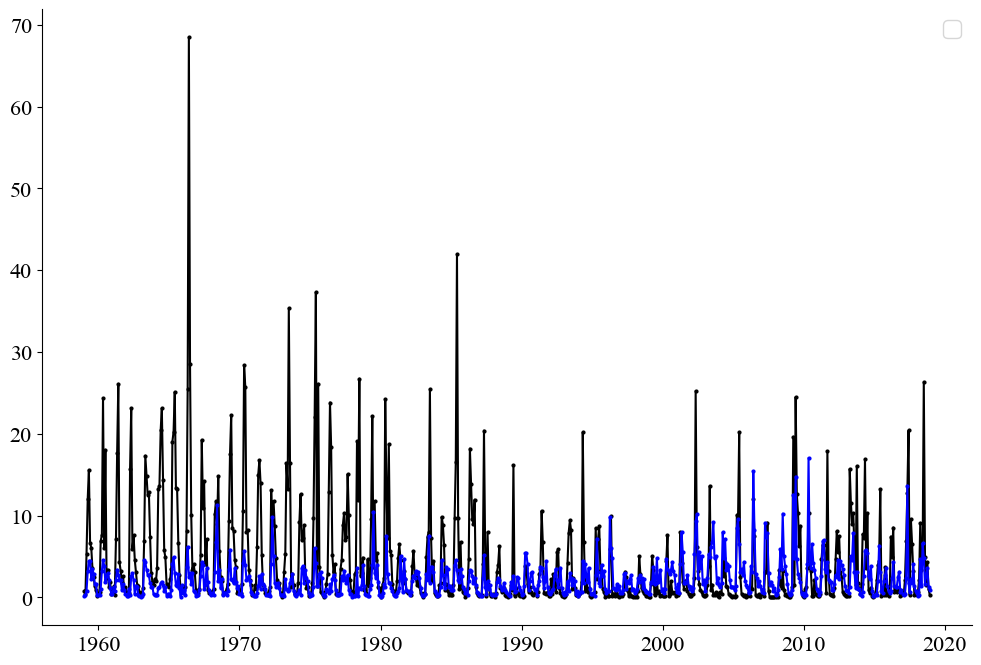

PyObject <matplotlib.legend.Legend object at 0x7fe6674cc3a0>

In [56]:
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)
ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
#ax.plot(times_year, fmean1, "ko-", markersize=2, label="Calanus fidmarchicus")
#ax.plot(times_year, fmean2, "bo-", markersize=2, label="Calanus helgolandicus")
ax.plot(times_month, fmean3, "ko-", markersize=2)
ax.plot(times_month, fmean4, "bo-", markersize=2)
plt.legend()